In [1]:
import pandas as pd
import json 
import os

In [2]:
data_directory = '../data/StatsBomb'
df_events = list()

## Concaténation de tous les matchs 
for file in os.listdir(data_directory) :
    # Sélection des données d'évènements
    if 'events.json' in file : 
        match_events_path = os.path.join(data_directory, file)
    else :
        continue
        # Lecture du json
    with open(match_events_path) as json_file:
        match_events = json.load(json_file)
    # Ajout du dataframe obtenu
    df_events.append(pd.read_json(match_events_path))
df_events = pd.concat(df_events)

In [3]:
df_events.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'obv_for_after',
       'obv_for_before', 'obv_for_net', 'obv_against_after',
       'obv_against_before', 'obv_against_net', 'obv_total_net', 'team',
       'duration', 'tactics', 'related_events', 'player', 'position',
       'location', 'pass', 'carry', 'ball_receipt', 'shot', 'goalkeeper',
       'under_pressure', 'counterpress', 'ball_recovery', 'dribble', 'duel',
       'out', 'clearance', 'off_camera', 'interception', 'foul_won',
       'foul_committed', 'block', 'substitution', 'miscontrol',
       'injury_stoppage', '50_50', 'bad_behaviour'],
      dtype='object')

In [4]:
# Regroupement des minutes
cluster = 1
df_events.loc[:, 'cluster_period'] = (45 // cluster + 1) * (df_events.period - 1) + df_events.minute // cluster

<Axes: xlabel='cluster_period'>

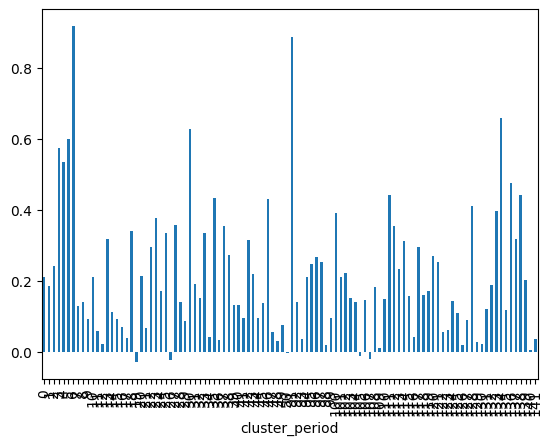

In [5]:
# Selection des données 
df_match_events_with_obv = df_events[~df_events.obv_for_net.isna()]
df_match_events_with_obv = df_match_events_with_obv[df_match_events_with_obv.shot.isna()]
df_match_events_with_obv = df_match_events_with_obv[df_match_events_with_obv.goalkeeper.isna()]

df_match_events_with_obv.groupby('cluster_period').obv_for_net.sum().plot.bar()

<Axes: xlabel='cluster_period'>

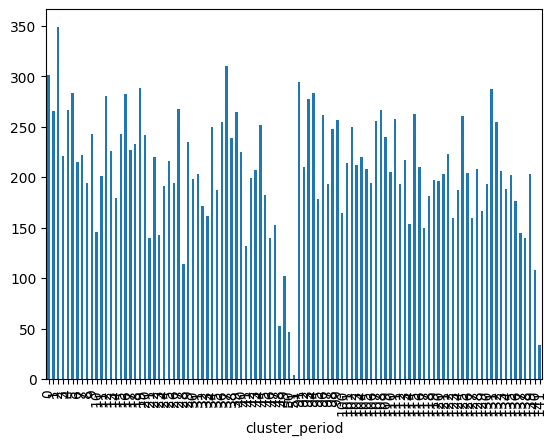

In [6]:
df_events.groupby('cluster_period').id.count().plot.bar()

In [13]:
df_events.loc[~df_events.player.isna(), 'player_id'] = df_events.loc[~df_events.player.isna(), 'player'].apply(lambda x: x['id'])
df_events.loc[~df_events.player.isna(), 'player_name'] = df_events.loc[~df_events.player.isna(), 'player'].apply(lambda x: x['name'])
df_events.loc[:, 'team_id'] = df_events.team.apply(lambda x: x['id'])

# Sélection des joueuses de ManCity
mask = df_events.team_id == 746
len(df_events[mask][['player_id', 'player_name']].drop_duplicates().sort_values(by = 'player_id'))

21